<a href="https://colab.research.google.com/github/Vcacciapuoti/EPICODE_DAPT0125/blob/main/%20COVID-19%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# URL del file CSV ufficiale
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Caricamento dei dati
df = pd.read_csv(url)

# Mostra le prime 5 righe
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [2]:
# Dimensioni del dataset
print(f"Il dataset contiene {df.shape[0]} righe e {df.shape[1]} colonne.")


Il dataset contiene 429435 righe e 67 colonne.


In [3]:
# Elenco delle colonne disponibili (metadati)
print("Colonne disponibili nel dataset:")
for col in df.columns:
    print("-", col)


Colonne disponibili nel dataset:
- iso_code
- continent
- location
- date
- total_cases
- new_cases
- new_cases_smoothed
- total_deaths
- new_deaths
- new_deaths_smoothed
- total_cases_per_million
- new_cases_per_million
- new_cases_smoothed_per_million
- total_deaths_per_million
- new_deaths_per_million
- new_deaths_smoothed_per_million
- reproduction_rate
- icu_patients
- icu_patients_per_million
- hosp_patients
- hosp_patients_per_million
- weekly_icu_admissions
- weekly_icu_admissions_per_million
- weekly_hosp_admissions
- weekly_hosp_admissions_per_million
- total_tests
- new_tests
- total_tests_per_thousand
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- positive_rate
- tests_per_case
- tests_units
- total_vaccinations
- people_vaccinated
- people_fully_vaccinated
- total_boosters
- new_vaccinations
- new_vaccinations_smoothed
- total_vaccinations_per_hundred
- people_vaccinated_per_hundred
- people_fully_vaccinated_per_hundred
- total_boosters_p

In [4]:
# Rimuove i valori dove "continent" è mancante (es. righe come "World", "European Union")
df_continenti = df.dropna(subset=["continent"])

# Calcola il massimo dei casi totali registrati per ogni continente (valore più recente disponibile)
casi_per_continente = df_continenti.groupby("continent")["total_cases"].max()

print("📊 Casi totali per continente:\n")
print(casi_per_continente)

# Calcola i casi totali globali (dalla riga 'World')
mondo = df[df["location"] == "World"]["total_cases"].max()

# Calcola la percentuale rispetto al totale mondiale
percentuali = (casi_per_continente / mondo) * 100

print("\n📈 Percentuali rispetto al totale mondiale:\n")
print(percentuali.round(2))


📊 Casi totali per continente:

continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64

📈 Percentuali rispetto al totale mondiale:

continent
Africa            0.52
Asia             12.81
Europe            5.03
North America    13.33
Oceania           1.53
South America     4.83
Name: total_cases, dtype: float64


In [5]:
# Filtra i dati dell'Italia nel solo anno 2022
italia_2022 = df[(df["location"] == "Italy") & (df["date"].str.startswith("2022"))]

# Rimuove righe con valori mancanti nei dati da usare
italia_2022 = italia_2022.dropna(subset=["total_cases", "new_cases"])

# Mostra le prime 5 righe filtrate
italia_2022[["date", "total_cases", "new_cases"]].head()


,date,total_cases,new_cases
186002,2022-01-01,5622431.0,0.0
186003,2022-01-02,6267035.0,644604.0
186004,2022-01-03,6267035.0,0.0
186005,2022-01-04,6267035.0,0.0
186006,2022-01-05,6267035.0,0.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_cases'].plot(kind='hist', bins=20, title='total_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['new_cases'].plot(kind='hist', bins=20, title='new_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='total_cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='total_cases', y='new_cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['new_cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('new_cases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['new_cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('new_cases')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['total_cases'].plot(kind='line', figsize=(8, 4), title='total_cases')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['new_cases'].plot(kind='line', figsize=(8, 4), title='new_cases')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='total_cases', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='new_cases', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: title={'center': 'Casi totali in Italia nel 2022'}, xlabel='date'>

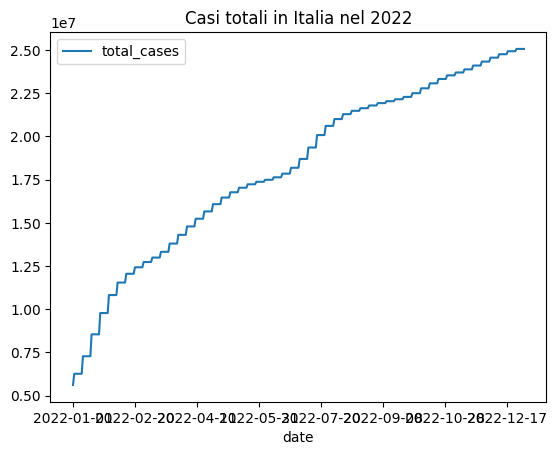

In [6]:
italia_2022.plot(x="date", y="total_cases", title="Casi totali in Italia nel 2022")


<Axes: title={'center': 'Nuovi casi giornalieri in Italia nel 2022'}, xlabel='date'>

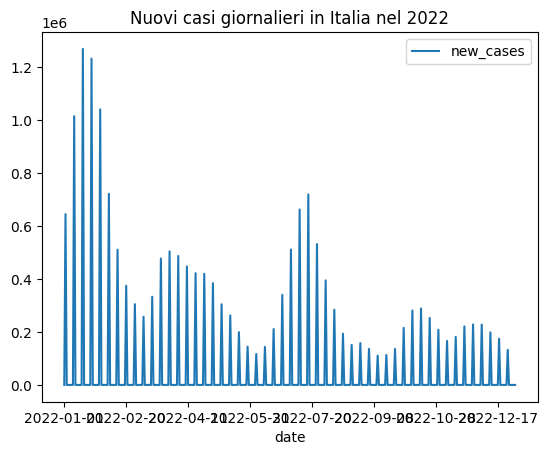

In [7]:
italia_2022.plot(x="date", y="new_cases", title="Nuovi casi giornalieri in Italia nel 2022")


In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)


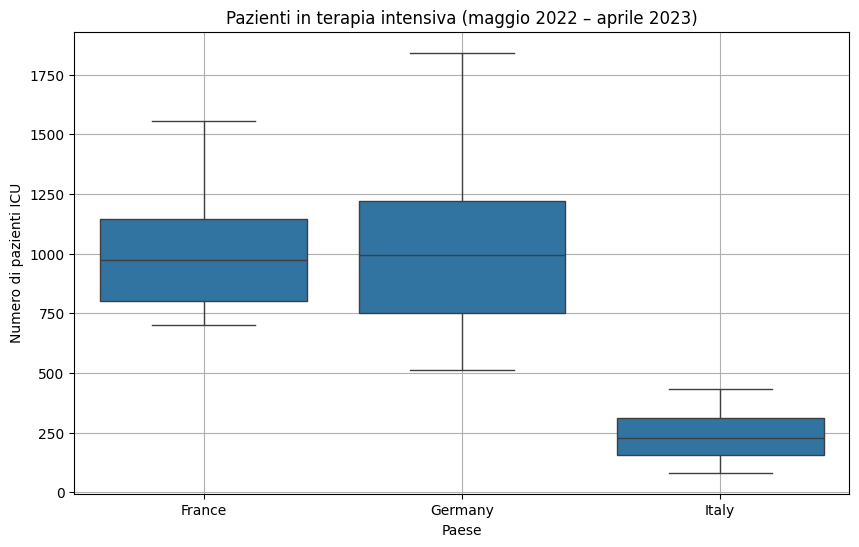

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converti la colonna 'date' in formato datetime
df["date"] = pd.to_datetime(df["date"])

# Filtra il periodo maggio 2022 – aprile 2023
periodo = df[(df["date"] >= "2022-05-01") & (df["date"] <= "2023-04-30")]

# Seleziona i dati di Italia, Germania e Francia
icu_df = periodo[periodo["location"].isin(["Italy", "Germany", "France"])]

# Rimuove righe senza dati ICU
icu_df = icu_df.dropna(subset=["icu_patients"])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=icu_df, x="location", y="icu_patients")
plt.title("Pazienti in terapia intensiva (maggio 2022 – aprile 2023)")
plt.ylabel("Numero di pazienti ICU")
plt.xlabel("Paese")
plt.grid(True)
plt.show()


La Germania ha una più ampia variabilità e i valori più elevati di pazienti in terapia intensiva.  
Per quanto riguarda la Francia, questa mostra valori più stabili ma comunque alti, mentre l’Italia ha numeri significativamente inferiori rispetto agli altri due Paesi.


 Numero di valori nulli per paese:

location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64


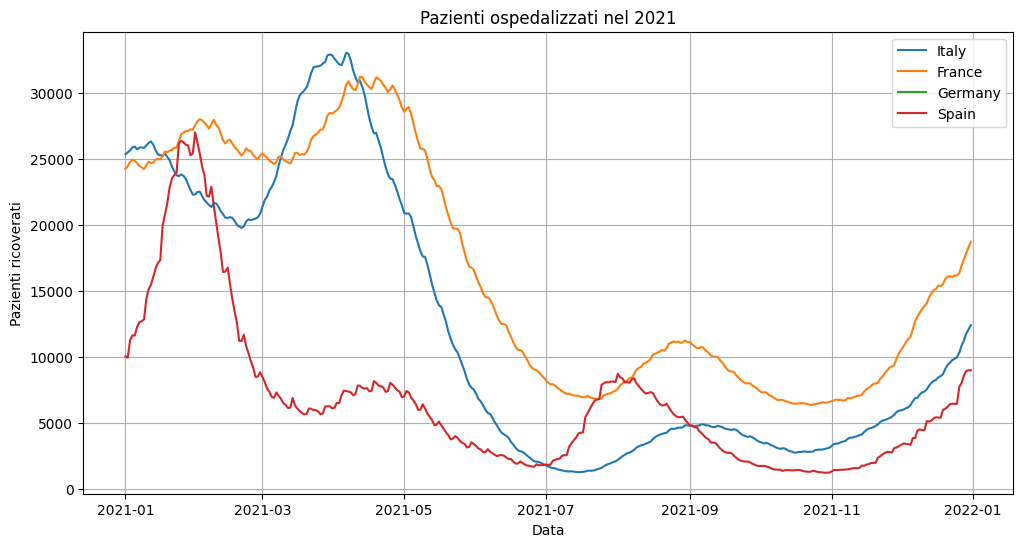

In [6]:
# Filtra solo i dati del 2021
anno_2021 = df[(df["date"].dt.year == 2021)]

# Paesi da considerare
paesi = ["Italy", "France", "Germany", "Spain"]

# Filtra i dati per quei paesi
hosp_2021 = anno_2021[anno_2021["location"].isin(paesi)]

# Verifica la presenza di valori nulli
null_counts = hosp_2021.groupby("location")["hosp_patients"].apply(lambda x: x.isnull().sum())
print(" Numero di valori nulli per paese:\n")
print(null_counts)

# Grafico delle curve dei ricoveri
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for paese in paesi:
    paese_df = hosp_2021[hosp_2021["location"] == paese]
    plt.plot(paese_df["date"], paese_df["hosp_patients"], label=paese)

plt.title("Pazienti ospedalizzati nel 2021")
plt.xlabel("Data")
plt.ylabel("Pazienti ricoverati")
plt.legend()
plt.grid(True)
plt.show()


Solo la Germania presenta valori nulli per l'intero anno 2021 nella colonna `hosp_patients` (365 valori nulli).  
Poiché mancano tutti i dati annuali, non è possibile sostituirli in modo attendibile: l’intera serie è assente.  
Pertanto, la Germania va esclusa dall’analisi dei ricoveri nel 2021.
